# <center> Unsupervised Learning 

This notebook covers Anomaly Detection, Dimensionality Reduction and Cluster Analysis.

Considering the data "processed.cleveland". It is of different physical parameters measured among patients in the parlance of cardiac diseases. 

refer http://archive.ics.uci.edu/ml/datasets/Heart+Disease for more information.

--> Loading the data into dataframe

In [2]:
import pandas as pd
import numpy as np

In [12]:
datas = pd.read_csv('processed.cleveland.data')
dataset = pd.DataFrame(datas)
dataset.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [13]:
dataset.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

**--> Importing all necessary libraries including the ones required for Box Plot, Isolation Forest, Factor Analysis, Principal Component Analysis, Hierarchical Clustering and k-Means**

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
#from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [6]:
pip install factor-analyzer

Note: you may need to restart the kernel to use updated packages.


In [7]:
from factor_analyzer import FactorAnalyzer

## Exploratory Data Analysis

**--> Performing univariate and bivariate analysis on the data**

In [8]:
variable_list = list(dataset.columns)
print(variable_list)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


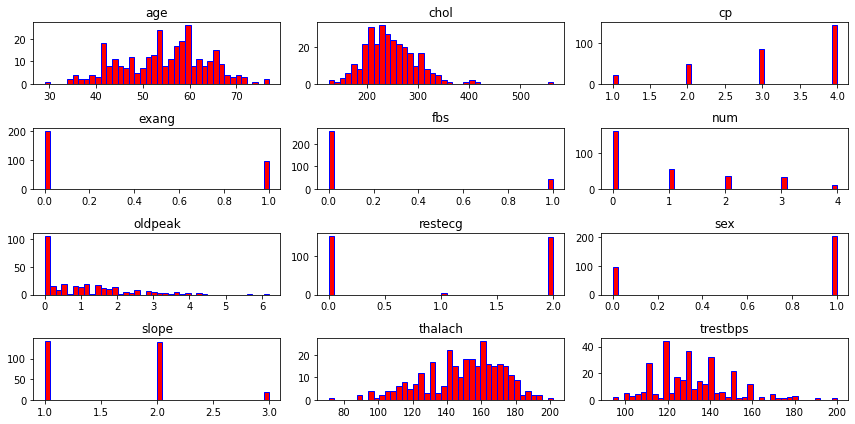

In [9]:
#Performing the univariate analysis on all the variables 
dataset[variable_list].hist(bins=40, edgecolor='b',grid=False,
                          figsize=(12,6), color='red')
plt.tight_layout()

In [17]:
########## Change column data types as needed ##########
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset['sex'] = labelencoder.fit_transform(dataset['sex'])
dataset['exang'] = labelencoder.fit_transform(dataset['exang'])
dataset['fbs'] = labelencoder.fit_transform(dataset['fbs'])
dataset['restecg'] = labelencoder.fit_transform(dataset['restecg'])
dataset['ca'] = labelencoder.fit_transform(dataset['ca'])
dataset['thal'] = labelencoder.fit_transform(dataset['thal'])


#dataset['slope','cp','thal']= dataset['slope','cp','thal'].astype(int)
#dataset['thal']= dataset['thal'].astype(int)
# dataset['slope']= dataset['slope'].astype(int)
# dataset['slope']= dataset['slope'].astype(int)
print (dataset.dtypes)


age         float64
sex           int64
cp          float64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope       float64
ca            int64
thal          int64
num           int64
dtype: object


In [18]:
dataset.ca.value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

In [19]:
dataset.thal.value_counts()

0    166
2    117
1     17
3      2
Name: thal, dtype: int64

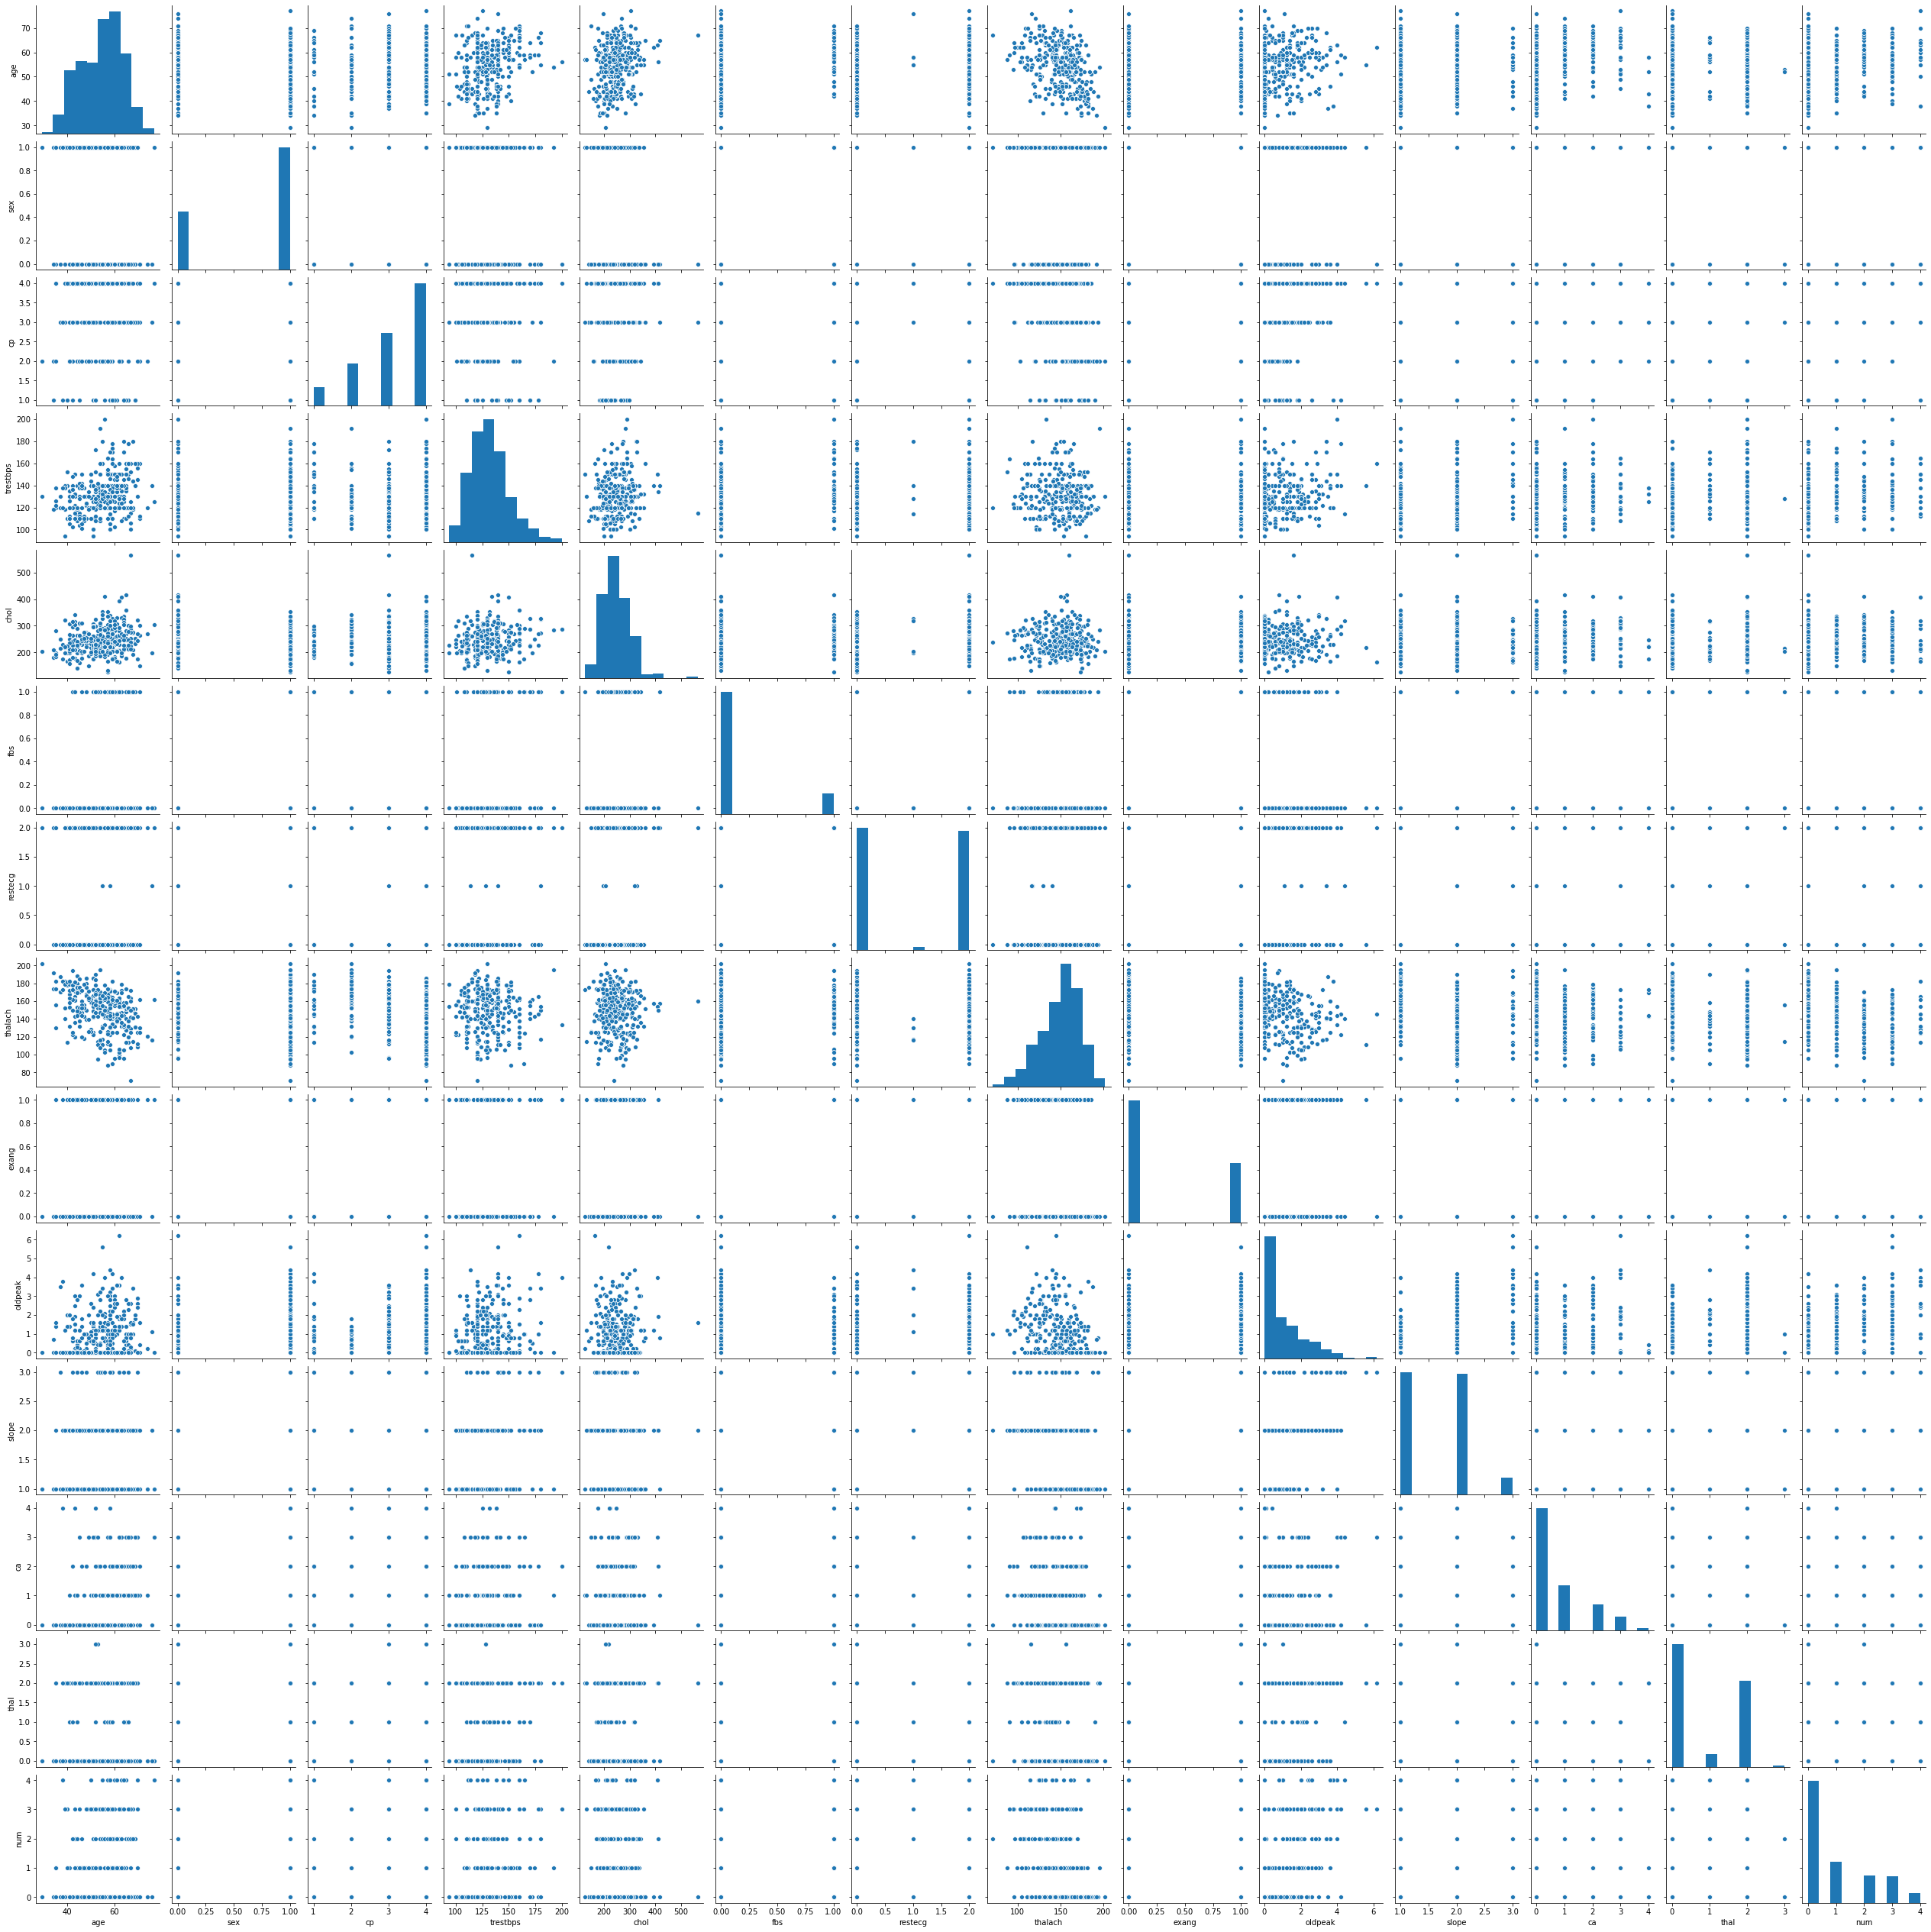

In [20]:
sns.pairplot(dataset[variable_list])

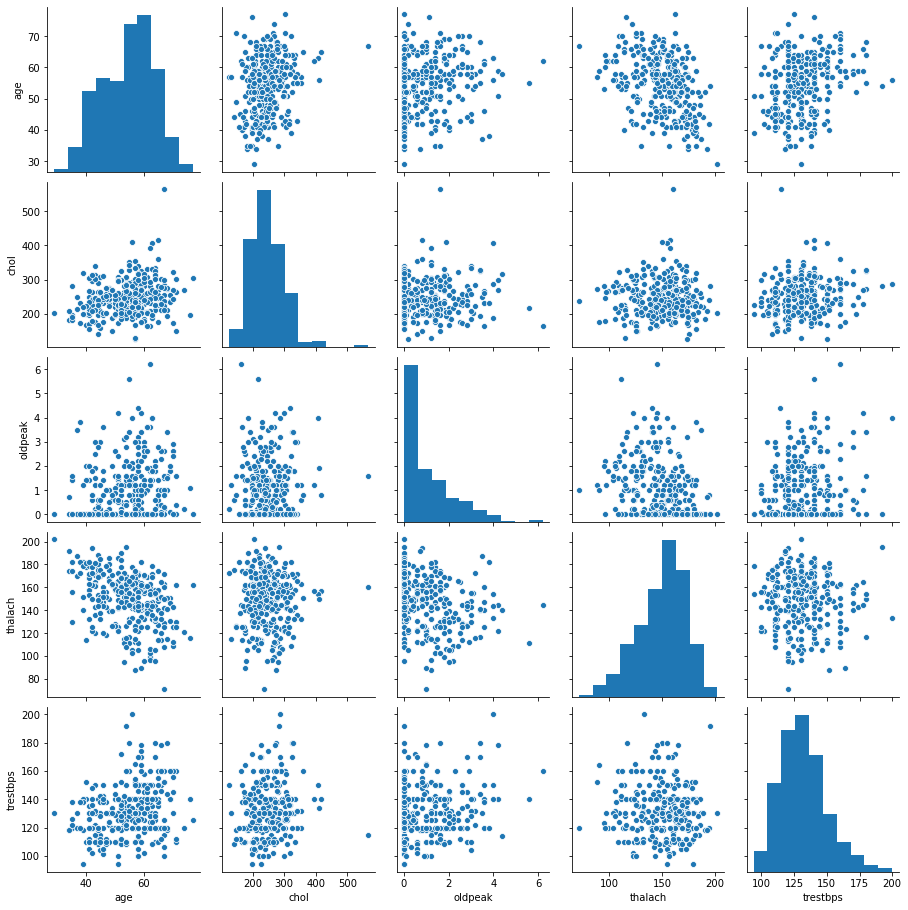

In [21]:
#performing bivariate analysis on only for continous variables
continous_list = list(dataset[['age', 'chol','oldpeak', 'thalach', 'trestbps']])
continous_list
sns.pairplot(dataset[continous_list])

## Anomaly Detection

**--> Running Box Plots of each of the continuous features. Looking for anomalies identified by Box Plots.**

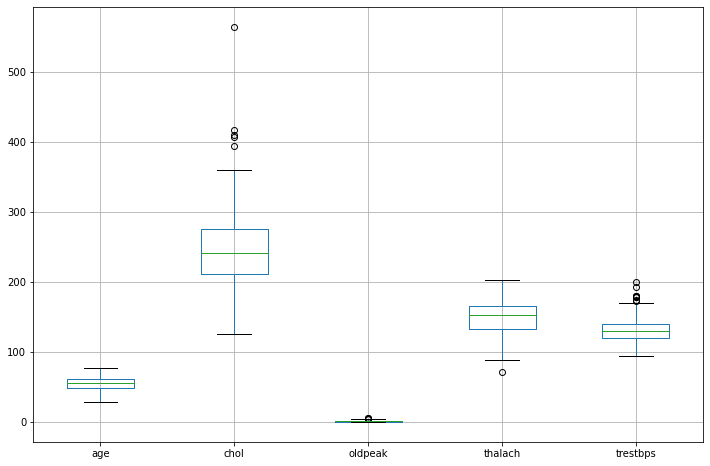

In [22]:
#creating dataframe for boxplots
df_boxplot = pd.DataFrame(dataset[continous_list])
# detecting anomaly for a univariate variable
plt.figure(figsize = (12, 8))
df_boxplot.boxplot()


***we can see that age variable has no outliers and thalach has one outlier. Chol,oldpeak and trestbps have fre outliers which can be further analysed with individual boxplots and isolation forest algorithm.***

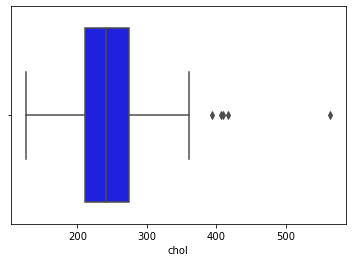

In [23]:
sns.boxplot(x="chol", palette=["b"], data = dataset)

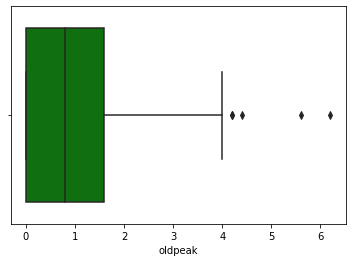

In [24]:
sns.boxplot(x="oldpeak", palette=["g"], data = dataset)

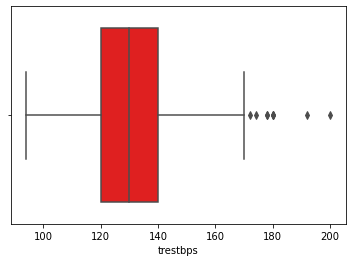

In [25]:
sns.boxplot(x="trestbps", palette=["r"], data = dataset)

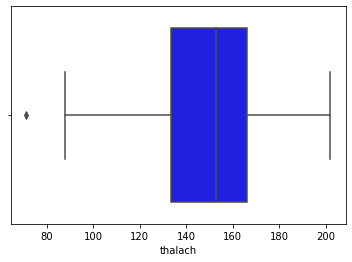

In [26]:
sns.boxplot(x="thalach", palette=["b"], data = dataset)
#the only outlier is a value less than 80 the min quantile area

In [27]:
## Removing outlier using IQR
Q1 = dataset[continous_list].quantile(0.25)
Q3 = dataset[continous_list].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         13.00
chol        64.00
oldpeak      1.60
thalach     32.75
trestbps    20.00
dtype: float64


In [28]:
Q1['chol']

211.0

In [29]:
# Using boxplot formula to label the outliers in the dataframe detected by boxplot for cholestrol variable
df_boxplot["label_boxplot_chol"] = np.where((df_boxplot["chol"] >= Q1['chol'] - 1.5 * IQR['chol']) & (df_boxplot["chol"] <= Q1['chol'] + 1.5 *IQR['chol']), 0,1)
df_boxplot.label_boxplot_chol.value_counts()

0    269
1     33
Name: label_boxplot_chol, dtype: int64

In [30]:
df_boxplot["label_boxplot_oldpeak"] = np.where((df_boxplot["oldpeak"] >= Q1['oldpeak'] - 1.5 * IQR['oldpeak']) & (df_boxplot["oldpeak"] <= Q1['oldpeak'] + 1.5 *IQR['oldpeak']), 0,1)
df_boxplot.label_boxplot_oldpeak.value_counts()

0    262
1     40
Name: label_boxplot_oldpeak, dtype: int64

In [31]:
df_boxplot["label_boxplot_thalach"] = np.where((df_boxplot["thalach"] >= Q1['thalach'] - 1.5 * IQR['thalach']) & (df_boxplot["thalach"] <= Q1['thalach'] + 1.5 *IQR['thalach']), 0,1)
df_boxplot.label_boxplot_thalach.value_counts()

0    290
1     12
Name: label_boxplot_thalach, dtype: int64

In [32]:
df_boxplot.head()

,age,chol,oldpeak,thalach,trestbps,label_boxplot_chol,label_boxplot_oldpeak,label_boxplot_thalach
0,67.0,286.0,1.5,108.0,160.0,0,0,0
1,67.0,229.0,2.6,129.0,120.0,0,1,0
2,37.0,250.0,3.5,187.0,130.0,0,1,1
3,41.0,204.0,1.4,172.0,130.0,0,0,0
4,56.0,236.0,0.8,178.0,120.0,0,0,0


**--> Running Isolation Forest on this data using all features and identifying anomalies by setting different cut-offs for anomaly score**

In [33]:
#df_2 = df_boxplot.drop(["label_boxplot_chol", "label_boxplot_oldpeak","label_boxplot_thalach"], axis = 1)
df_label = dataset["num"]
df_2 = dataset.iloc[:,:-1]
df_2.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [37]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_2_scaled = scaler.fit_transform(df_2)
#transforming to dataframe
df_2_scaled = pd.DataFrame(df_2_scaled, columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [38]:
clf=IsolationForest(n_estimators=50, max_samples=6000, contamination=float(.20), \
                        max_features=1.0, bootstrap=False, random_state=42, verbose=0, behaviour = "new")

In [39]:
df_2_scaled_w_label = df_2_scaled.join(df_label)
clf.fit(df_2_scaled)
pred_all = clf.predict(df_2_scaled)
df_2_scaled_w_label["pred_if"] = pred_all

C:\Users\oth.nousatraining\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:252: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  warn(
C:\Users\oth.nousatraining\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:285: UserWarning: max_samples (6000) is greater than the total number of samples (302). max_samples will be set to n_samples for estimation.
  warn("max_samples (%s) is greater than the "


In [40]:
df_2_scaled_w_label["pred_if"] = np.where(df_2_scaled_w_label["pred_if"] == 1, 0, 1)

In [41]:
df_2_scaled_w_label.pred_if.value_counts()

0    241
1     61
Name: pred_if, dtype: int64

In [42]:
df_2_scaled_w_label["anomaly_score"] = clf.decision_function(df_2_scaled)

In [43]:
df_2_scaled_w_label.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,pred_if,anomaly_score
0,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,0.75,0.000000,2,0,0.004308
1,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.50,0.666667,1,0,0.056786
2,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.00,0.000000,0,1,-0.011943
3,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.00,0.000000,0,0,0.035627
4,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.0,0.816794,0.0,0.129032,0.0,0.00,0.000000,0,0,0.096345


In [44]:
x=df_2_scaled_w_label.sort_values(by=['anomaly_score'],ascending=False)

In [45]:
data = x.iloc[12:]
data.reset_index(drop=True, inplace=True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,pred_if,anomaly_score
0,0.645833,1.0,1.000000,0.292453,0.301370,0.0,1.0,0.534351,1.0,0.451613,0.5,0.25,0.666667,1,0,0.101242
1,0.708333,1.0,1.000000,0.339623,0.292237,0.0,1.0,0.580153,0.0,0.225806,0.5,0.25,0.666667,2,0,0.099079
2,0.520833,1.0,0.666667,0.245283,0.301370,0.0,1.0,0.580153,0.0,0.064516,0.5,0.00,0.666667,0,0,0.098990
3,0.416667,0.0,1.000000,0.339623,0.326484,0.0,0.0,0.702290,0.0,0.000000,0.0,0.00,0.000000,0,0,0.098559
4,0.625000,1.0,1.000000,0.415094,0.331050,0.0,1.0,0.847328,0.0,0.000000,0.0,0.00,0.000000,0,0,0.096685


based on the analysis conducted using boxplot and the isolation forest algorithm to detect anomalies, dropping around 12 anamolies from the dataset and using the cleaned data for further analysis.

**--> Running Factor Analysis on the data and identifying the best factor solution using Eigen Values**

In [46]:
#Choosing the Number of Factors
fa = FactorAnalyzer(rotation=None)
fa.fit(data)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.79218797, 2.30898286, 1.45225871, 1.17853206, 1.03941986,
       0.97543483, 0.88418255, 0.84871745, 0.7292979 , 0.64342094,
       0.52098531, 0.43100293, 0.39507283, 0.35086132, 0.28764148,
       0.162001  ])

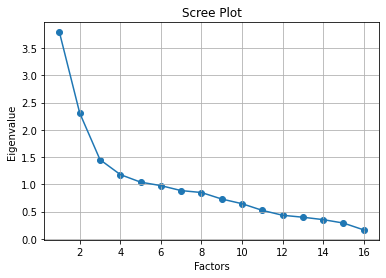

In [47]:
plt.scatter(range(1,data.shape[1]+1),ev)
plt.plot(range(1,data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

*Here, we can see only for 5-factors eigenvalues are greater than one. 
It means we need to choose 5 factors*

In [49]:
#Create factor analysis object and perform factor analysis
#orthogonal rotation using varimax
fa_varimax = FactorAnalyzer(rotation="varimax")
fa_varimax.fit(data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [50]:
fa_varimax.loadings_

array([[ 0.27572708,  0.12525707,  0.43260435],
       [ 0.33708454, -0.00810654, -0.54414098],
       [ 0.50591547, -0.24939176,  0.09997671],
       [ 0.13010643,  0.27659514,  0.22585233],
       [ 0.0393458 ,  0.05813086,  0.34133802],
       [ 0.00172773,  0.56902209, -0.02522259],
       [ 0.14577252,  0.04399968,  0.16622876],
       [-0.5783735 ,  0.0095465 , -0.23797126],
       [ 0.51930603,  0.03506117,  0.00721876],
       [ 0.59098738,  0.17605236,  0.11508452],
       [ 0.48990463,  0.13569398,  0.11484565],
       [ 0.37499846,  0.23187206,  0.09067496],
       [ 0.57985801,  0.10235487, -0.26329143],
       [ 0.79478522,  0.11407092,  0.01376683],
       [ 0.10251989,  0.87506214,  0.12184814],
       [-0.14326262, -0.89442739, -0.22711164]])

In [51]:
fa.get_factor_variance()

(array([3.25668364, 1.88439351, 0.77086754]),
 array([0.20354273, 0.11777459, 0.04817922]),
 array([0.20354273, 0.32131732, 0.36949654]))

In [52]:
#non-orthogonal rotation using varimax
fa_promax = FactorAnalyzer(rotation="promax")
fa_promax.fit(data)

FactorAnalyzer(rotation_kwargs={})

In [53]:
fa_promax.loadings_

array([[ 0.21735398,  0.03033884, -0.41264857],
       [ 0.42574904,  0.03287662,  0.61264417],
       [ 0.54878616, -0.3412814 , -0.07708231],
       [ 0.07275265,  0.23962991, -0.19319632],
       [-0.01046585,  0.00357862, -0.35018177],
       [-0.06546993,  0.60191377,  0.09097996],
       [ 0.12582172,  0.00230245, -0.1545557 ],
       [-0.57706681,  0.11949752,  0.18793321],
       [ 0.539663  , -0.02961526,  0.05460505],
       [ 0.58332112,  0.09297696, -0.03559158],
       [ 0.48228281,  0.06330595, -0.05123192],
       [ 0.35292717,  0.18261035, -0.02772263],
       [ 0.63016116,  0.07518656,  0.35519132],
       [ 0.81809367,  0.01776892,  0.08750042],
       [-0.01685022,  0.88832737, -0.0188365 ],
       [-0.00976588, -0.88734239,  0.1234538 ]])

In [54]:
fa_promax.get_factor_variance()

(array([2.94361085, 2.18184151, 0.93604378]),
 array([0.18397568, 0.13636509, 0.05850274]),
 array([0.18397568, 0.32034077, 0.37884351]))

**-->Running Principal Component Analysis (PCA) and identifying top PCAs to be able to explain at least 85% of the variance in the data**

In [56]:
# Separating out the features
x = df_2
# Separating out the target
y = df_label
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [57]:
#calculate the mean
data_mean = np.mean(x)
# centralize our data by removing the mean from each value within our dataset
data_center = x - data_mean
#calculate the covariance matrix for our centralized data in order to check the covariance score for each column 
# with respect to the actual column
cov_matrix = np.cov(data_center)
#eigen decomposition
eigenval, eigenvec = np.linalg.eig(cov_matrix)

C:\Users\oth.nousatraining\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


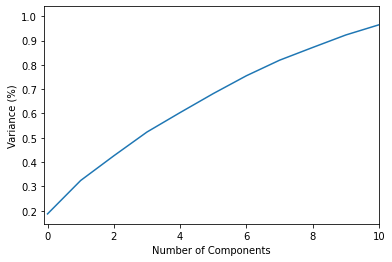

In [66]:
#calculate the significance of our components in order to generate an Explained Variance plot
significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(significance))
plt.xlim(left = -0.1, right = 10)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

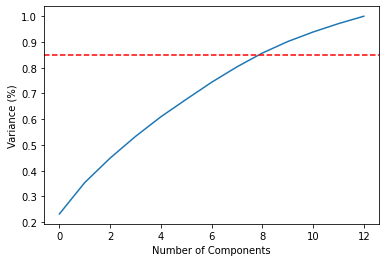

In [72]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(x)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.axhline(y=0.85, color='r', linestyle='--')
plt.show()

***From the above plot, we can see that the number of components for a variance of 85% would be 8.***

In [61]:
#fitting the model
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8'])

In [67]:
finalDf = pd.concat([principalDf, data[['num']]], axis = 1)

In [68]:
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,num
0,3.118793,1.421125,-0.067814,-0.868011,0.170507,-0.971597,0.202823,-0.889125,1.0
1,3.088435,-0.650591,-0.152313,-0.605570,-0.084699,-1.142801,0.354100,-0.170143,2.0
2,-0.407463,-1.377925,-0.482706,2.868226,-0.747979,0.186396,-0.502503,2.289054,0.0
3,-2.268888,0.367276,-0.431498,1.138684,-0.794256,-0.232518,0.741282,0.061378,0.0
4,-2.206093,-0.365080,0.382262,0.280788,0.385964,-0.522672,-0.686119,0.001676,0.0


**--> Running Hierarchical Clustering using the original features without the anomalies. Finding the optimal cluster solution based on DB score**

In [75]:
#considering the data after sclaing using minmax scaler without the num column
df_2_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,0.75,0.000000
1,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.50,0.666667
2,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.00,0.000000
3,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.00,0.000000
4,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.0,0.816794,0.0,0.129032,0.0,0.00,0.000000


In [79]:
label_encoder = LabelEncoder() 
data_num_encoded = label_encoder.fit_transform(dataset["num"])
data_num_encoded

array([2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       3, 4, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 3, 1, 3, 0, 4, 0, 0, 0, 1,
       4, 0, 4, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1,
       0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 2, 3, 1,
       1, 0, 2, 2, 0, 0, 0, 3, 2, 3, 4, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 4, 3,
       1, 1, 1, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 4, 1, 0,
       1, 0, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 3, 1, 2, 0, 3, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 4,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 2, 4, 2,
       0, 0, 0, 1, 0, 2, 2, 1, 0, 3, 1, 1, 2, 3, 1,

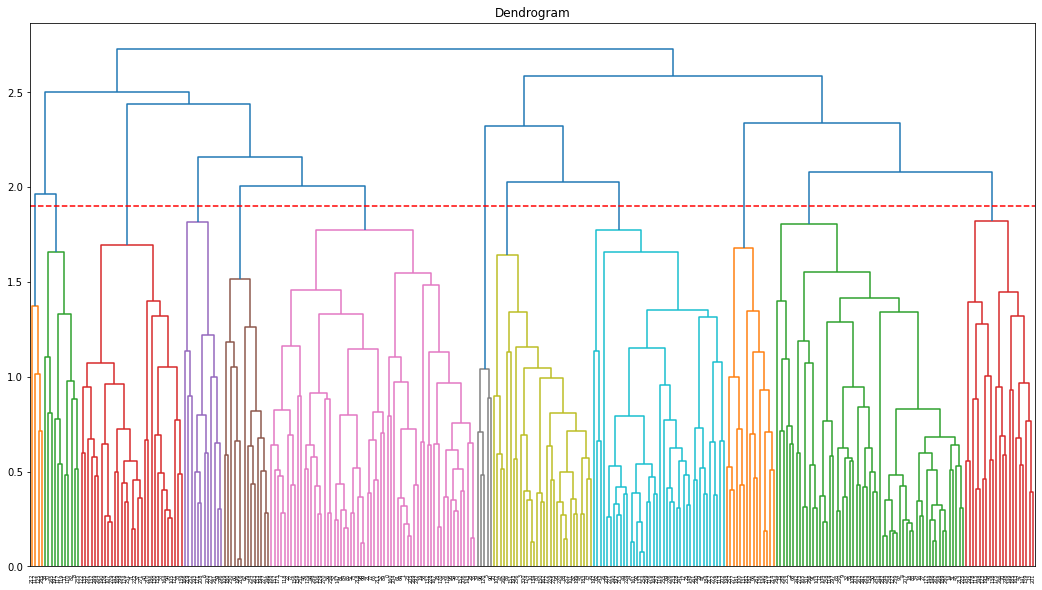

In [108]:
# using dendrogram to decide number of clusters 
plt.figure(figsize=(18, 10))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(df_2_scaled, method='complete'))
plt.axhline(y=1.9, color='r', linestyle='--')

In [109]:
# model considering number of clusters to be 12
cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='complete')  
clust_id_12 = cluster.fit_predict(df_2_scaled)
clust_id_12

array([ 7,  7,  3,  9,  3,  6,  1,  7,  8,  3,  9,  8,  3,  0,  3,  3,  3,
        2,  3,  7,  9,  7,  7,  7,  2,  2,  2,  3,  7,  2,  8,  3,  3,  4,
        3,  7,  7,  4,  8,  6,  4,  2,  0,  9,  7,  3,  7,  9,  0,  2,  3,
        7,  7,  4,  7,  3,  7,  7,  7,  1, 10,  7,  2,  3,  7,  7,  5, 10,
        3,  2,  0,  4,  7,  7,  9,  7,  9,  7,  7, 10,  9,  7,  8,  3,  7,
        7,  9,  9,  9,  7,  6,  3,  2,  9,  4,  7,  6,  3,  7,  7,  5,  9,
        9,  3,  3,  4,  7,  4,  3, 10,  8,  5, 11,  2,  3,  0,  2,  8,  7,
        8,  6,  4,  4,  0,  9, 11,  4,  3,  2,  7,  4,  5,  7,  2,  9,  4,
        5,  4,  0,  4,  5,  0,  4,  7,  3,  0,  3,  7,  2,  0,  9,  9,  7,
       10,  7,  4,  7,  7,  3,  0,  7,  2,  9,  0,  4,  3,  1,  7,  2,  4,
        7,  1,  9,  7,  4,  0,  7,  3,  0,  7, 10,  5,  5,  9,  2,  0,  4,
        5,  7,  3,  4,  8,  2,  9, 10,  0, 10,  2,  5,  9,  1,  0,  2,  3,
        7,  7,  7,  3,  1,  2,  4,  7, 11,  3,  5,  2, 10,  2,  7,  1,  9,
        2,  4,  1,  2,  3

In [110]:
# model considering number of clusters to be 11
cluster = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='complete')  
clust_id_11 = cluster.fit_predict(df_2_scaled)
clust_id_11

array([ 7,  7,  8,  9,  8,  6,  3,  7,  0,  8,  9,  0,  8,  1,  8,  8,  8,
        2,  8,  7,  9,  7,  7,  7,  2,  2,  2,  8,  7,  2,  0,  8,  8,  4,
        8,  7,  7,  4,  0,  6,  4,  2,  1,  9,  7,  8,  7,  9,  1,  2,  8,
        7,  7,  4,  7,  8,  7,  7,  7,  3, 10,  7,  2,  8,  7,  7,  5, 10,
        8,  2,  1,  4,  7,  7,  9,  7,  9,  7,  7, 10,  9,  7,  0,  8,  7,
        7,  9,  9,  9,  7,  6,  8,  2,  9,  4,  7,  6,  8,  7,  7,  5,  9,
        9,  8,  8,  4,  7,  4,  8, 10,  0,  5,  0,  2,  8,  1,  2,  0,  7,
        0,  6,  4,  4,  1,  9,  0,  4,  8,  2,  7,  4,  5,  7,  2,  9,  4,
        5,  4,  1,  4,  5,  1,  4,  7,  8,  1,  8,  7,  2,  1,  9,  9,  7,
       10,  7,  4,  7,  7,  8,  1,  7,  2,  9,  1,  4,  8,  3,  7,  2,  4,
        7,  3,  9,  7,  4,  1,  7,  8,  1,  7, 10,  5,  5,  9,  2,  1,  4,
        5,  7,  8,  4,  0,  2,  9, 10,  1, 10,  2,  5,  9,  3,  1,  2,  8,
        7,  7,  7,  8,  3,  2,  4,  7,  0,  8,  5,  2, 10,  2,  7,  3,  9,
        2,  4,  3,  2,  8

In [86]:
# model considering number of clusters to be 9
cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='complete')  
clust_id_9 = cluster.fit_predict(df_2_scaled)
clust_id_9

array([2, 2, 8, 0, 8, 6, 7, 2, 1, 8, 0, 1, 8, 3, 8, 8, 8, 0, 8, 2, 0, 2,
       2, 2, 0, 0, 0, 8, 2, 0, 1, 8, 8, 4, 8, 2, 2, 4, 1, 6, 4, 0, 3, 0,
       2, 8, 2, 0, 3, 0, 8, 2, 2, 4, 2, 8, 2, 2, 2, 7, 2, 2, 0, 8, 2, 2,
       5, 2, 8, 0, 3, 4, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 8, 2, 2, 0, 0,
       0, 2, 6, 8, 0, 0, 4, 2, 6, 8, 2, 2, 5, 0, 0, 8, 8, 4, 2, 4, 8, 2,
       1, 5, 1, 0, 8, 3, 0, 1, 2, 1, 6, 4, 4, 3, 0, 1, 4, 8, 0, 2, 4, 5,
       2, 0, 0, 4, 5, 4, 3, 4, 5, 3, 4, 2, 8, 3, 8, 2, 0, 3, 0, 0, 2, 2,
       2, 4, 2, 2, 8, 3, 2, 0, 0, 3, 4, 8, 7, 2, 0, 4, 2, 7, 0, 2, 4, 3,
       2, 8, 3, 2, 2, 5, 5, 0, 0, 3, 4, 5, 2, 8, 4, 1, 0, 0, 2, 3, 2, 0,
       5, 0, 7, 3, 0, 8, 2, 2, 2, 8, 7, 0, 4, 2, 1, 8, 5, 0, 2, 0, 2, 7,
       0, 0, 4, 7, 0, 8, 0, 2, 2, 0, 2, 2, 7, 0, 2, 1, 2, 0, 8, 8, 0, 0,
       8, 0, 8, 8, 2, 8, 3, 4, 8, 4, 0, 8, 0, 0, 0, 5, 8, 0, 0, 0, 8, 2,
       4, 1, 3, 8, 8, 2, 2, 4, 0, 8, 5, 0, 0, 5, 0, 4, 8, 7, 8, 8, 8, 1,
       8, 5, 8, 2, 0, 4, 2, 7, 8, 3, 7, 8, 3, 4, 0,

In [87]:
# model considering number of clusters to be 10
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete')  
clust_id_10 = cluster.fit_predict(df_2_scaled)
clust_id_10

array([0, 0, 8, 9, 8, 6, 7, 0, 1, 8, 9, 1, 8, 3, 8, 8, 8, 2, 8, 0, 9, 0,
       0, 0, 2, 2, 2, 8, 0, 2, 1, 8, 8, 4, 8, 0, 0, 4, 1, 6, 4, 2, 3, 9,
       0, 8, 0, 9, 3, 2, 8, 0, 0, 4, 0, 8, 0, 0, 0, 7, 0, 0, 2, 8, 0, 0,
       5, 0, 8, 2, 3, 4, 0, 0, 9, 0, 9, 0, 0, 0, 9, 0, 1, 8, 0, 0, 9, 9,
       9, 0, 6, 8, 2, 9, 4, 0, 6, 8, 0, 0, 5, 9, 9, 8, 8, 4, 0, 4, 8, 0,
       1, 5, 1, 2, 8, 3, 2, 1, 0, 1, 6, 4, 4, 3, 9, 1, 4, 8, 2, 0, 4, 5,
       0, 2, 9, 4, 5, 4, 3, 4, 5, 3, 4, 0, 8, 3, 8, 0, 2, 3, 9, 9, 0, 0,
       0, 4, 0, 0, 8, 3, 0, 2, 9, 3, 4, 8, 7, 0, 2, 4, 0, 7, 9, 0, 4, 3,
       0, 8, 3, 0, 0, 5, 5, 9, 2, 3, 4, 5, 0, 8, 4, 1, 2, 9, 0, 3, 0, 2,
       5, 9, 7, 3, 2, 8, 0, 0, 0, 8, 7, 2, 4, 0, 1, 8, 5, 2, 0, 2, 0, 7,
       9, 2, 4, 7, 2, 8, 2, 0, 0, 9, 0, 0, 7, 2, 0, 1, 0, 2, 8, 8, 2, 2,
       8, 2, 8, 8, 0, 8, 3, 4, 8, 4, 9, 8, 2, 2, 9, 5, 8, 2, 9, 2, 8, 0,
       4, 1, 3, 8, 8, 0, 0, 4, 2, 8, 5, 9, 2, 5, 2, 4, 8, 7, 8, 8, 8, 1,
       8, 5, 8, 0, 2, 4, 0, 7, 8, 3, 7, 8, 3, 4, 9,

In [111]:
#using davies_bouldin_score index for clust = 2
from sklearn.metrics import davies_bouldin_score 
  
print("DB Score for Cluster = 9 is: ", davies_bouldin_score(df_2_scaled, clust_id_9))
print("DB Score for Cluster = 10 is: ", davies_bouldin_score(df_2_scaled, clust_id_10))
print("DB Score for Cluster = 11 is: ", davies_bouldin_score(df_2_scaled, clust_id_11))
print("DB Score for Cluster = 12 is: ", davies_bouldin_score(df_2_scaled, clust_id_12))

DB Score for Cluster = 9 is:  1.4195923007986813
DB Score for Cluster = 10 is:  1.3595070373994624
DB Score for Cluster = 11 is:  1.447401358682293
DB Score for Cluster = 12 is:  1.4286264893988558


*From the above comparision, we see that the DB score for 10 clusters is the least. Hence considering the optimum clusters to be 10.*

**--> Running the k-Means Clustering using Principal Components chosen in PCA Analysis**

In [96]:
#considering the scaled data as above
## Optimal number of clusters
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_2_scaled)
    Sum_of_squared_distances.append(km.inertia_)

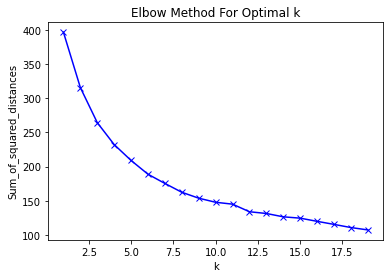

In [97]:
## Visualize elbow plot
def elbow_plot(k,wss):
    plt.plot(k, wss, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
elbow_plot(k=K,wss=Sum_of_squared_distances) 
plt.show()  

*From the elbow method, we can observe the curve starting to flatten at k=8. Though there is no clarity for K from the scree plot, let us consider 8 as the optimum clusters in this scenario*

In [100]:
## Kmeans with optinum clusters
kmeans= KMeans(n_clusters=8,random_state=2018)
kmeans.fit(df_2_scaled)

KMeans(random_state=2018)

In [101]:
op=kmeans.predict(df_2_scaled)
## Cluster Distribution
unique, counts = np.unique(op, return_counts=True)
np.vstack((unique, counts)).T

array([[ 0, 43],
       [ 1, 22],
       [ 2, 56],
       [ 3, 40],
       [ 4, 34],
       [ 5, 35],
       [ 6, 21],
       [ 7, 51]], dtype=int64)

**--> Comparing the values of the features in the clusters obtained in both of the cluster solutions**

In [106]:
#k-means considering the optimal clusters to be 8)
pd.crosstab(op,df_label)

num,0,1,2,3,4
row_0,,,,,
0,6,12,8,13,4
1,8,6,5,3,0
2,37,11,5,3,0
3,38,0,2,0,0
4,9,7,9,7,2
5,26,3,0,4,2
6,15,1,2,2,1
7,24,15,5,3,4


In [112]:
#Considering optimal clusters to be 10 from dendoram hierarchical clustering
pd.crosstab(data_num_encoded, clust_id_10, rownames=['original'], colnames=['cluster'])

cluster,0,1,2,3,4,5,6,7,8,9
original,,,,,,,,,,
0,23,1,38,15,8,10,0,5,37,26
1,21,3,0,1,7,4,0,5,11,3
2,13,6,2,2,7,0,0,1,5,0
3,12,5,0,2,7,1,3,1,3,1
4,7,0,0,1,2,0,2,0,1,0
